Data Cleaning
====
- Normalization and Scaling
- Standardization
- Sampling
- Feature Selection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn import preprocessing
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
np.random.seed(1)

In [2]:
# Creating the dataframe  
index = ['Person 1', 'Person 2', 'Person 3', 'Person 4', 'Person 5','Person 6']
df = pd.DataFrame({"Age":[20,65,25,22,55,90], 
                   "Salary":[25000, 25500, 25700,26900,25400,70000], 
                   "Class":["?", "No", "Yes","Yes","No","No"] 
                  }, index=index) 
    
# Print the dataframe 
df

,Age,Salary,Class
Person 1,20,25000,?
Person 2,65,25500,No
Person 3,25,25700,Yes
Person 4,22,26900,Yes
Person 5,55,25400,No
Person 6,90,70000,No


In [3]:
print("distance(1,2)", math.dist(df.values[0,0:2], df.values[1,0:2]))
print("distance(1,3)",math.dist(df.values[0,0:2], df.values[2,0:2]))
print("distance(1,4)",math.dist(df.values[0,0:2], df.values[3,0:2]))
print("distance(1,5)",math.dist(df.values[0,0:2], df.values[4,0:2]))
print("Without scaling, 2 and 5 are closer to Person 1 than Person 3 and 4")

distance(1,2) 502.0209158989295
distance(1,3) 700.0178569150931
distance(1,4) 1900.0010526312872
distance(1,5) 401.52833025827704
Without scaling, 2 and 5 are closer to Person 1 than Person 3 and 4


In [4]:
df_scaled = df.copy()
print(df_scaled[["Age","Salary"]] )
col_min = df_scaled[["Age","Salary"]].min()
col_max = df_scaled[["Age","Salary"]].max()
print("\n\nMinimum of Columns\n", col_min)
print("\n\nMaximum of Columns\n", col_max)
df_scaled[["Age","Salary"]] =(df_scaled[["Age","Salary"]]-col_min)/(col_max-col_min)
df_scaled

          Age  Salary
Person 1   20   25000
Person 2   65   25500
Person 3   25   25700
Person 4   22   26900
Person 5   55   25400
Person 6   90   70000


Minimum of Columns
 Age          20
Salary    25000
dtype: int64


Maximum of Columns
 Age          90
Salary    70000
dtype: int64


,Age,Salary,Class
Person 1,0.000000,0.000000,?
Person 2,0.642857,0.011111,No
Person 3,0.071429,0.015556,Yes
Person 4,0.028571,0.042222,Yes
Person 5,0.500000,0.008889,No
Person 6,1.000000,1.000000,No


In [5]:
print("distance(1,2)", math.dist(df_scaled.values[0,0:2], df_scaled.values[1,0:2]))
print("distance(1,3)",math.dist(df_scaled.values[0,0:2], df_scaled.values[2,0:2]))
print("distance(1,4)",math.dist(df_scaled.values[0,0:2], df_scaled.values[3,0:2]))
print("distance(1,5)",math.dist(df_scaled.values[0,0:2], df_scaled.values[4,0:2]))
print("After Scaling, Person 3 and Person 4 are closer Person 1 than Person 2 and Person 5")

distance(1,2) 0.6429531576348098
distance(1,3) 0.07310277781978264
distance(1,4) 0.050980805995933035
distance(1,5) 0.5000790061037146
After Scaling, Person 3 and Person 4 are closer Person 1 than Person 2 and Person 5


In [6]:
#Normalizing all the columns .. Accessing the columns with the columns' names
df_s = df.copy()
  
# Normalize the attributes, ignore the class label (last attribute)
for column in df_s.columns[:-1]:
    df_s[column] = (df_s[column]-df_s[column].min())/(df_s[column].max()-df_s[column].min())

df_s

,Age,Salary,Class
Person 1,0.000000,0.000000,?
Person 2,0.642857,0.011111,No
Person 3,0.071429,0.015556,Yes
Person 4,0.028571,0.042222,Yes
Person 5,0.500000,0.008889,No
Person 6,1.000000,1.000000,No


In [7]:
#Accessing the values of the columns through the iloc function
dfCopy = df.copy()
col_min = dfCopy.iloc[:,0:-1].min()
col_max = dfCopy.iloc[:,0:-1].max()
dfCopy.iloc[:,0:-1] =(dfCopy.iloc[:,0:-1]-col_min)/(col_max-col_min)
dfCopy

,Age,Salary,Class
Person 1,0.000000,0.000000,?
Person 2,0.642857,0.011111,No
Person 3,0.071429,0.015556,Yes
Person 4,0.028571,0.042222,Yes
Person 5,0.500000,0.008889,No
Person 6,1.000000,1.000000,No


#### Normalization using numpy

In [8]:
dfCopy = df.copy()
X = dfCopy.values[:,0:-1]  #creating a copy of all the columns, except the class label, X is an ndarray (numpy) object
X = X.astype(int) #convert X's dtype from object to int
print(X.dtype, type(X), X.shape,"\n", X)
X = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
dfCopy[dfCopy.columns[:-1]]=X
dfCopy

int32 <class 'numpy.ndarray'> (6, 2) 
 [[   20 25000]
 [   65 25500]
 [   25 25700]
 [   22 26900]
 [   55 25400]
 [   90 70000]]


,Age,Salary,Class
Person 1,0.000000,0.000000,?
Person 2,0.642857,0.011111,No
Person 3,0.071429,0.015556,Yes
Person 4,0.028571,0.042222,Yes
Person 5,0.500000,0.008889,No
Person 6,1.000000,1.000000,No


#### Normalization using numpy and scikit learn
--More info at https://scikit-learn.org/stable/modules/preprocessing.html

In [9]:
dfCopy = df.copy()
X = dfCopy.values[:,0:-1]  #columns, except the class label, of the matrix of the dataframe
X = X.astype(int) #convert X's dtype from object to int
X_scaled = preprocessing.MinMaxScaler().fit_transform(X)
dfCopy.iloc[:,0:-1] = X_scaled
dfCopy

,Age,Salary,Class
Person 1,0.000000,0.000000,?
Person 2,0.642857,0.011111,No
Person 3,0.071429,0.015556,Yes
Person 4,0.028571,0.042222,Yes
Person 5,0.500000,0.008889,No
Person 6,1.000000,1.000000,No


### Calculating the distances between all the points using the cidst method from scipy package

In [10]:
from scipy.spatial.distance import cdist
print("Distance between the points before scaling")
out_X = cdist(X, X, metric='cityblock')
print(out_X)

print("\n\nDistance between the points after scaling")
out_X_scaled  = cdist(X_scaled ,X_scaled , metric='cityblock')
print(out_X_scaled)

Distance between the points before scaling
[[    0.   545.   705.  1902.   435. 45070.]
 [  545.     0.   240.  1443.   110. 44525.]
 [  705.   240.     0.  1203.   330. 44365.]
 [ 1902.  1443.  1203.     0.  1533. 43168.]
 [  435.   110.   330.  1533.     0. 44635.]
 [45070. 44525. 44365. 43168. 44635.     0.]]


Distance between the points after scaling
[[0.         0.65396825 0.08698413 0.07079365 0.50888889 2.        ]
 [0.65396825 0.         0.57587302 0.64539683 0.14507937 1.34603175]
 [0.08698413 0.57587302 0.         0.06952381 0.4352381  1.91301587]
 [0.07079365 0.64539683 0.06952381 0.         0.5047619  1.92920635]
 [0.50888889 0.14507937 0.4352381  0.5047619  0.         1.49111111]
 [2.         1.34603175 1.91301587 1.92920635 1.49111111 0.        ]]


## Iris Dataset
The data set is stored in a 150x4 ndarray.  
Each row (iris) is described by four features (Sepal Length, Sepal Width, Petal Length and Petal Width). 
It has three different types of irises (Setosa, Versicolour, and Virginica). 

In [11]:
iris = sns.load_dataset('iris') #load iris dataset as a dataframe

In [12]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [13]:
#The maximum absolute scaling; new attributes' range:  -1 to  1
# copy the data
iris_scaled = iris.copy()
  
# Normalize the attributes, ignore the class label (last attribute)
for c in iris_scaled.columns[:-1]:
    iris_scaled[c] = iris_scaled[c]  / iris_scaled[c].abs().max()
 
print("Min\n",iris_scaled[iris_scaled.columns[:-1]].min())
print("\n\nMax\n",iris_scaled[iris_scaled.columns[:-1]].max())
#view first 10 rows
iris_scaled.head()

Min
 sepal_length    0.544304
sepal_width     0.454545
petal_length    0.144928
petal_width     0.040000
dtype: float64


Max
 sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.645570,0.795455,0.202899,0.08,setosa
1,0.620253,0.681818,0.202899,0.08,setosa
2,0.594937,0.727273,0.188406,0.08,setosa
3,0.582278,0.704545,0.217391,0.08,setosa
4,0.632911,0.818182,0.202899,0.08,setosa


In [14]:
iris_s = iris.copy()
#scaling; new attributes' range:  0 to  1  
# Normalize the attributes, ignore the class label (last attribute)
for c in iris_s.columns[:-1]:
    iris_s[c] = (iris_s[c]-iris_s[c].min())/(iris_s[c].max()-iris_s[c].min())

print("Min\n",iris_s[iris_s.columns[:-1]].min())
print("\n\nMax\n",iris_s[iris_s.columns[:-1]].max())
iris_s.head()

Min
 sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
dtype: float64


Max
 sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


## standardize the data to zero mean and unit variance.

In [15]:
iris_scaled = iris.copy()
X = iris_scaled.values[:,0:-1]  #columns, except the class label, of the matrix of the dataframe
X = X.astype(float) #convert X's dtype from object to float
X_scaled = preprocessing.StandardScaler().fit_transform(X)
iris_scaled.iloc[:,0:-1] = X_scaled
iris_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


In [16]:
#.to_numpy()
print("Columns means before Scaling\n",iris[iris.columns[:-1]].mean())
print("\n\nColumns means after Scaling\n",round(iris_scaled[iris_scaled.columns[:-1]].mean(),3))

Columns means before Scaling
 sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64


Columns means after Scaling
 sepal_length   -0.0
sepal_width    -0.0
petal_length   -0.0
petal_width    -0.0
dtype: float64


In [17]:
print("Columns standard deviations Before Scaling\n",iris[iris.columns[:-1]].std())
print("\n\nColumns standard deviations After Scaling\n",iris_scaled[iris_scaled.columns[:-1]].std())


Columns standard deviations Before Scaling
 sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64


Columns standard deviations After Scaling
 sepal_length    1.00335
sepal_width     1.00335
petal_length    1.00335
petal_width     1.00335
dtype: float64


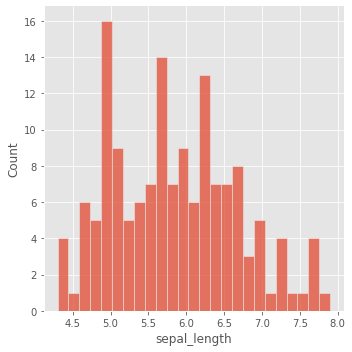

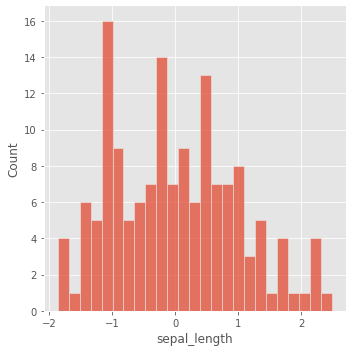

In [18]:
sns.displot(iris, x="sepal_length", bins=25)
plt.show()
sns.displot(iris_scaled, x="sepal_length",  bins=25)
plt.show()

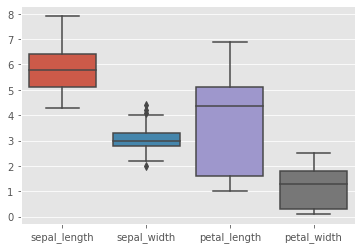

In [19]:
sns.boxplot(data=iris)
plt.show()

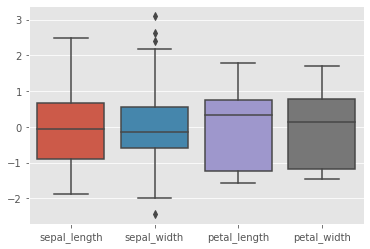

In [20]:
sns.boxplot(data=iris_scaled)
plt.show()

## Discretization

In [21]:
iris = sns.load_dataset('iris') #load iris dataset as a dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Equal-Width Binning

In [22]:
pd.cut(iris['sepal_length'], bins=4) #Four bins for the sepal_length attribute

0      (4.296, 5.2]
1      (4.296, 5.2]
2      (4.296, 5.2]
3      (4.296, 5.2]
4      (4.296, 5.2]
           ...     
145      (6.1, 7.0]
146      (6.1, 7.0]
147      (6.1, 7.0]
148      (6.1, 7.0]
149      (5.2, 6.1]
Name: sepal_length, Length: 150, dtype: category
Categories (4, interval[float64, right]): [(4.296, 5.2] < (5.2, 6.1] < (6.1, 7.0] < (7.0, 7.9]]

In [23]:
pd.cut(iris['sepal_length'], bins=4, labels=False) #Four bins for the sepal_length attribute

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    1
Name: sepal_length, Length: 150, dtype: int64

In [24]:
irisCopy = iris.copy()
for c in iris.columns[:-1]:
    irisCopy[c] = pd.cut(iris[c], bins=4,labels=False) #four bins

print(irisCopy)

     sepal_length  sepal_width  petal_length  petal_width    species
0               0            2             0            0     setosa
1               0            1             0            0     setosa
2               0            1             0            0     setosa
3               0            1             0            0     setosa
4               0            2             0            0     setosa
..            ...          ...           ...          ...        ...
145             2            1             2            3  virginica
146             2            0             2            2  virginica
147             2            1             2            3  virginica
148             2            2             2            3  virginica
149             1            1             2            2  virginica

[150 rows x 5 columns]


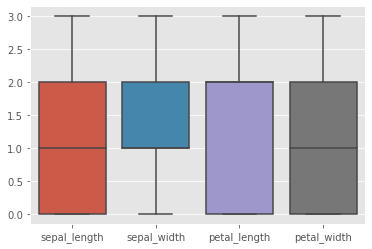

In [25]:
sns.boxplot(data=irisCopy)
plt.show()

In [26]:
#equal frequency binning, using quantiles
pd.qcut(iris['sepal_length'], q=4) #Four quantiles for the sepal_length attribute

0      (4.2989999999999995, 5.1]
1      (4.2989999999999995, 5.1]
2      (4.2989999999999995, 5.1]
3      (4.2989999999999995, 5.1]
4      (4.2989999999999995, 5.1]
                 ...            
145                   (6.4, 7.9]
146                   (5.8, 6.4]
147                   (6.4, 7.9]
148                   (5.8, 6.4]
149                   (5.8, 6.4]
Name: sepal_length, Length: 150, dtype: category
Categories (4, interval[float64, right]): [(4.2989999999999995, 5.1] < (5.1, 5.8] < (5.8, 6.4] < (6.4, 7.9]]

In [27]:
pd.qcut(iris['sepal_length'], q=[0, .15, .25, .5,.75, 1]) #define the quantiles

0                     (5.0, 5.1]
1      (4.2989999999999995, 5.0]
2      (4.2989999999999995, 5.0]
3      (4.2989999999999995, 5.0]
4      (4.2989999999999995, 5.0]
                 ...            
145                   (6.4, 7.9]
146                   (5.8, 6.4]
147                   (6.4, 7.9]
148                   (5.8, 6.4]
149                   (5.8, 6.4]
Name: sepal_length, Length: 150, dtype: category
Categories (5, interval[float64, right]): [(4.2989999999999995, 5.0] < (5.0, 5.1] < (5.1, 5.8] < (5.8, 6.4] < (6.4, 7.9]]

In [28]:
irisCopy = iris.copy()
irisCopy['sepal_length'] = pd.qcut(iris['sepal_length'], q=4,labels=False) #Four bins for the sepal_length attribute
irisCopy.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0,3.5,1.4,0.2,setosa
1,0,3.0,1.4,0.2,setosa
2,0,3.2,1.3,0.2,setosa
3,0,3.1,1.5,0.2,setosa
4,0,3.6,1.4,0.2,setosa


In [29]:
irisCopy = iris.copy()
for c in iris.columns[:-1]:
    irisCopy[c] = pd.qcut(iris[c], q=4,labels=False) #define the quantiles of the ranges

irisCopy.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0,3,0,0,setosa
1,0,1,0,0,setosa
2,0,2,0,0,setosa
3,0,2,0,0,setosa
4,0,3,0,0,setosa
5,1,3,1,1,setosa
6,0,3,0,0,setosa
7,0,3,0,0,setosa
8,0,1,0,0,setosa
9,0,2,0,0,setosa


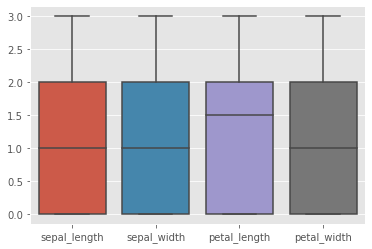

In [30]:
sns.boxplot(data=irisCopy)
plt.show()

## Sampling

In [31]:
# Creating the dataframe  
index = ['Person 1','Person 2','Person 3','Person 4','Person 5','Person 6','Person 7','Person 8','Person 9','Person 10']
df = pd.DataFrame({"Age":[20,65,25,22,55,70,40,60,80,77], 
                   "Salary":[25000, 25500, 25700,26900,25400,55000,39700,35900,32400,60000], 
                   "Class":["No", "Yes", "Yes","Yes","No","No","Yes","Yes","Yes","Yes"] 
                  }, index=index) 
    
# Print the dataframe 
df

,Age,Salary,Class
Person 1,20,25000,No
Person 2,65,25500,Yes
Person 3,25,25700,Yes
Person 4,22,26900,Yes
Person 5,55,25400,No
Person 6,70,55000,No
Person 7,40,39700,Yes
Person 8,60,35900,Yes
Person 9,80,32400,Yes
Person 10,77,60000,Yes


In [32]:
df_sample = df.sample(n=4)
df_sample

,Age,Salary,Class
Person 3,25,25700,Yes
Person 10,77,60000,Yes
Person 7,40,39700,Yes
Person 5,55,25400,No


In [33]:
#Sample 2 rows from each class
df_sample = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(2))
df_sample

,Age,Salary,Class
Person 6,70,55000,No
Person 1,20,25000,No
Person 7,40,39700,Yes
Person 9,80,32400,Yes


In [34]:
#Sample 60% for each class
df_sample = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=.6))
df_sample

,Age,Salary,Class
Person 5,55,25400,No
Person 1,20,25000,No
Person 9,80,32400,Yes
Person 10,77,60000,Yes
Person 3,25,25700,Yes
Person 2,65,25500,Yes


# Feature Selection

## Using Mutual Information
### Calculating the mutual information between the features and the class label. Attributes with higher mutual information are more important.
#### We will remove the two columns that have the lowest mutual information with the class label in the iris dataset

In [35]:
from sklearn.feature_selection import mutual_info_classif
iris_new = iris.copy()

#Converting species to [0,1,2] instead of class names ['setosa', 'versicolor','virginica']
iris_new_label = iris_new['species'].replace(['setosa', 'versicolor','virginica'], [0, 1, 2])

#print(iris_new_label)

# determine the mutual information
mutual_info = mutual_info_classif(iris_new[iris_new.columns[:-1]],iris_new_label)
print(mutual_info)
#np.sort(mutual_info)
out_index = np.argsort(mutual_info)
print("Indices of the elements: ", out_index)
print("Output sorted array : ", mutual_info[out_index])

column1 = iris_new.columns[out_index[0]]
column2 = iris_new.columns[out_index[1]]

iris_new = iris_new.drop([column1, column2], axis=1)
iris_new


[0.48238704 0.22621327 0.98407112 0.98733285]
Indices of the elements:  [1 0 2 3]
Output sorted array :  [0.22621327 0.48238704 0.98407112 0.98733285]


,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


In [36]:
#Select the best two features using the selectKBest from skitleaearn
#This is the same approach as the previous code, 
# but this approach is more general and works to keep the best k columns
#Change the value of bestk

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

bestk = 2 #try k = 1 and 3
iris_new = iris.copy()
#Converting species to [0,1,2] instead of class names ['setosa', 'versicolor','virginica']
iris_new_label = iris_new['species'].replace(['setosa', 'versicolor','virginica'], [0, 1, 2])

#Now we Will select the top two important features .. k=1, k=2 , or k=3
select_bestk_cols = SelectKBest(mutual_info_classif, k=bestk)
select_bestk_cols.fit(iris_new[iris_new.columns[:-1]], iris_new_label)
print("Indicator flag of which columns to keep", select_bestk_cols.get_support())
print("Columns to be kept",iris_new.columns[:-1][select_bestk_cols.get_support()])
print("Columns to be removed",iris_new.columns[:-1][~select_bestk_cols.get_support()])
iris_new = iris_new.drop(iris_new.columns[:-1][~select_bestk_cols.get_support()],axis=1)
iris_new

Indicator flag of which columns to keep [False False  True  True]
Columns to be kept Index(['petal_length', 'petal_width'], dtype='object')
Columns to be removed Index(['sepal_length', 'sepal_width'], dtype='object')


,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica
